In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

# import scaling
from sklearn.preprocessing import StandardScaler


In [42]:
df = ''

In [43]:
## F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

def loaddata():
    global df
    data = input("Enter the path of your file:")
    df = pd.read_csv(data)
    df.head()
    df.tail()
    return df
    # print(df)

In [44]:
loaddata()

Enter the path of your file:telecom_users.csv


,ID,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [45]:
#F2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)

def f2(df):
  return df.shape, df.columns, df.dtypes, df.describe

#using describe to summarise the dataset. With the result we canexamine the range of numerical values, 
#to see if there are any far outside of our expected range. 

In [46]:
f2(df)

((5986, 22),
 Index(['ID', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'),
 ID                    int64
 customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyCharges      float64
 TotalCharges

In [47]:
df.isnull().sum()

ID                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:

df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


,ID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,404.312500
50%,3546.500000,0.000000,29.000000,70.400000,1412.150000
75%,5291.750000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [49]:
#replacing the null values of total charges with the 50% quartile amount of 1412.15

df.describe()
df.isnull().sum()
df['TotalCharges'].describe()
df['TotalCharges'].fillna(1412.1500,inplace=True)
df.columns

Index(['ID', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
df.isnull().sum()

ID                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there were 10 empty values for Total charges. I replaced them with the 50th quartile value to make sure there were no null values


In [51]:
#F3: remove unnecessary/useless columns (based on results of F2 and your background knowledge and the problem to be solved), e.g., 
#identifiers, multiple primary keys, extra KPI like GMROI in sales which is the same for the whole year etc

# i have generalised the funtion by inputting the name whichever i want to drop based on the data set.

def f3(df):
  column_name = input("Enter the column you want to drop:")
  df.dropna(subset=[column_name], inplace=True)

In [52]:
#dropping customer id columns Since that don't have any influence on target variable
df.drop("customerID",axis = 1,inplace = True)

#f3(df)

In [53]:
df.drop("ID",axis = 1,inplace = True)

In [54]:
#to see missing values in each column and to see the dropped column
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
#F6: analyze missing values of one or more columns using mano module

def mano_module():
    mano.bar(df)
    mano.matrix(df)
    mano.heatmap(df, figsize=(12,6))
    mano.dendrogram(df)

# visualize the location of the missingness of data using mano.matrix, bar, heatmap and dendogram


C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\HP\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2833: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


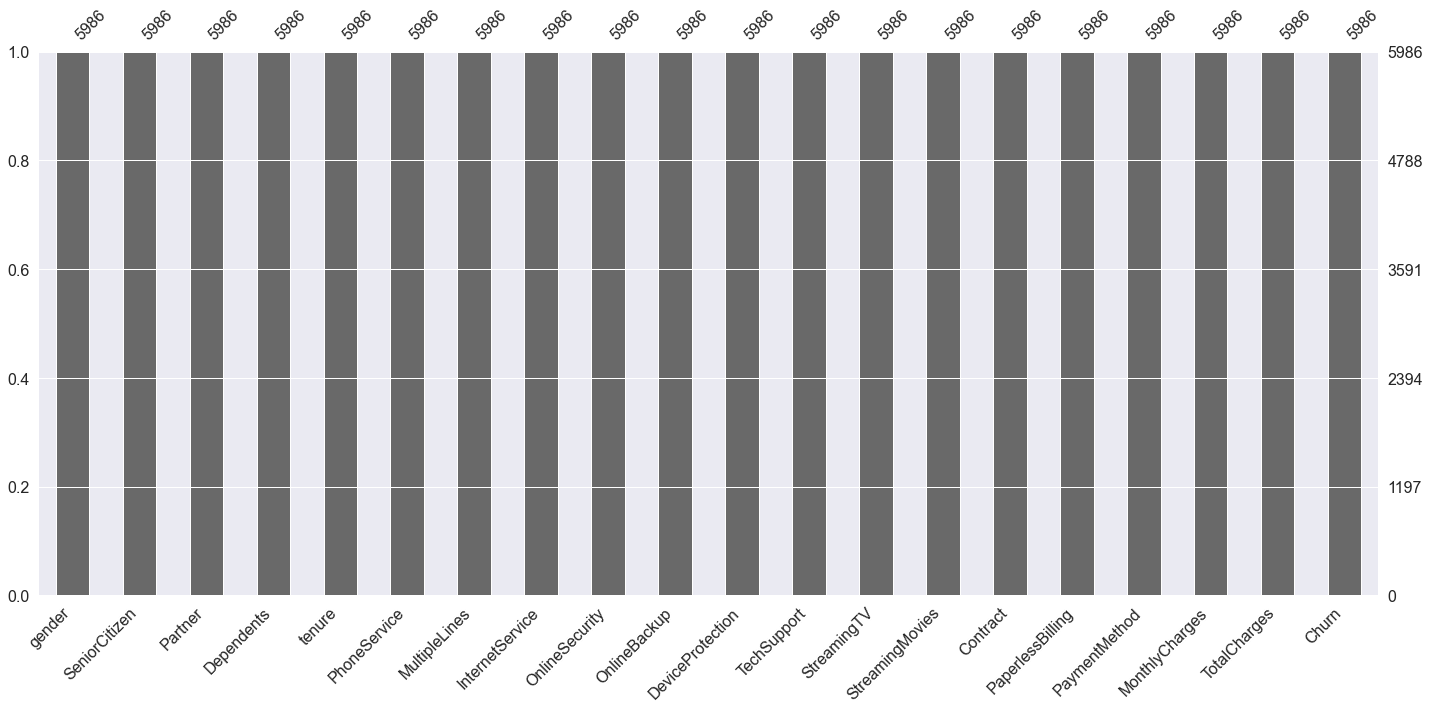

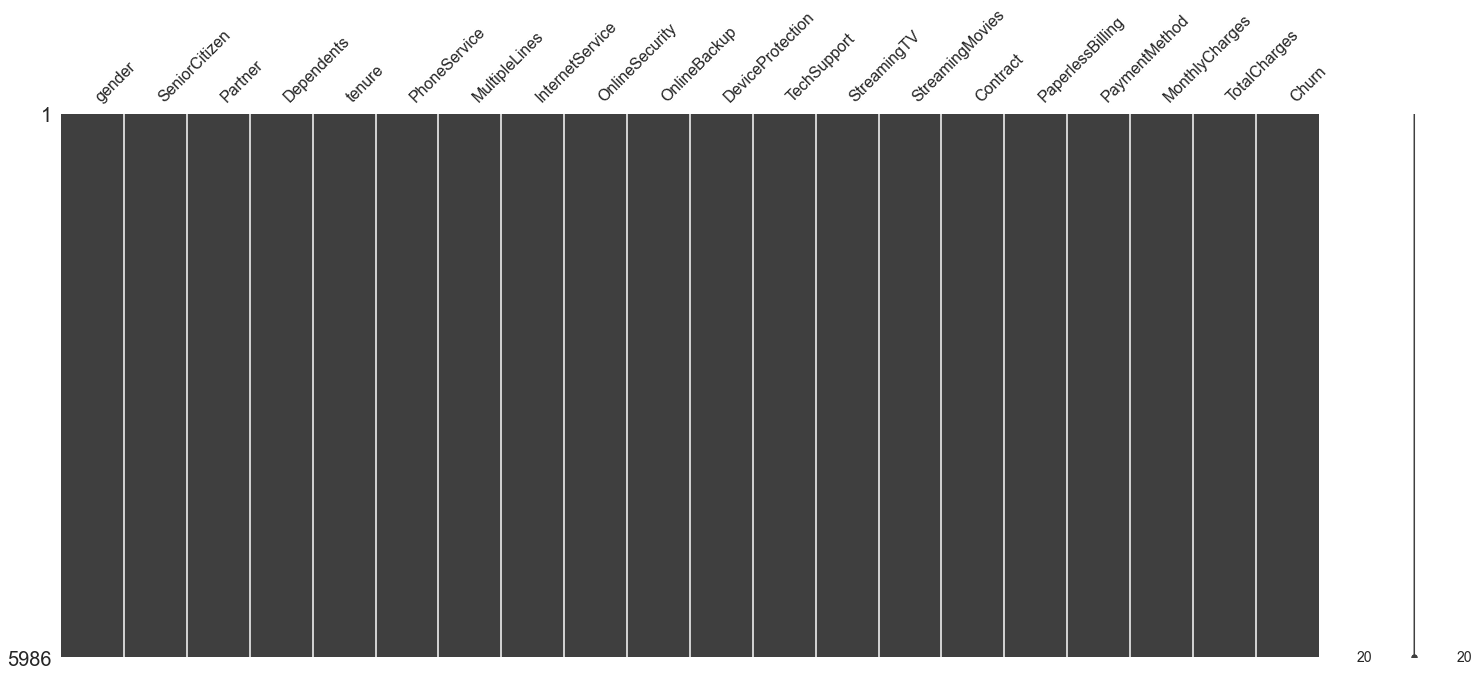

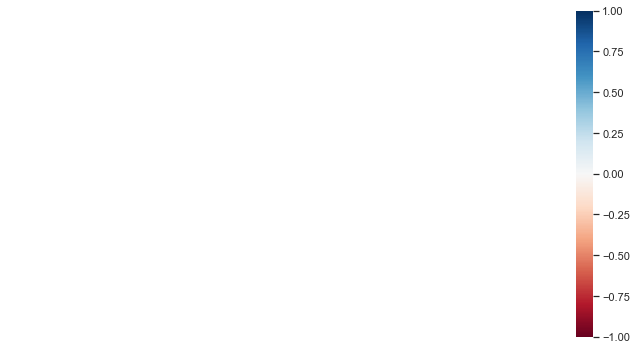

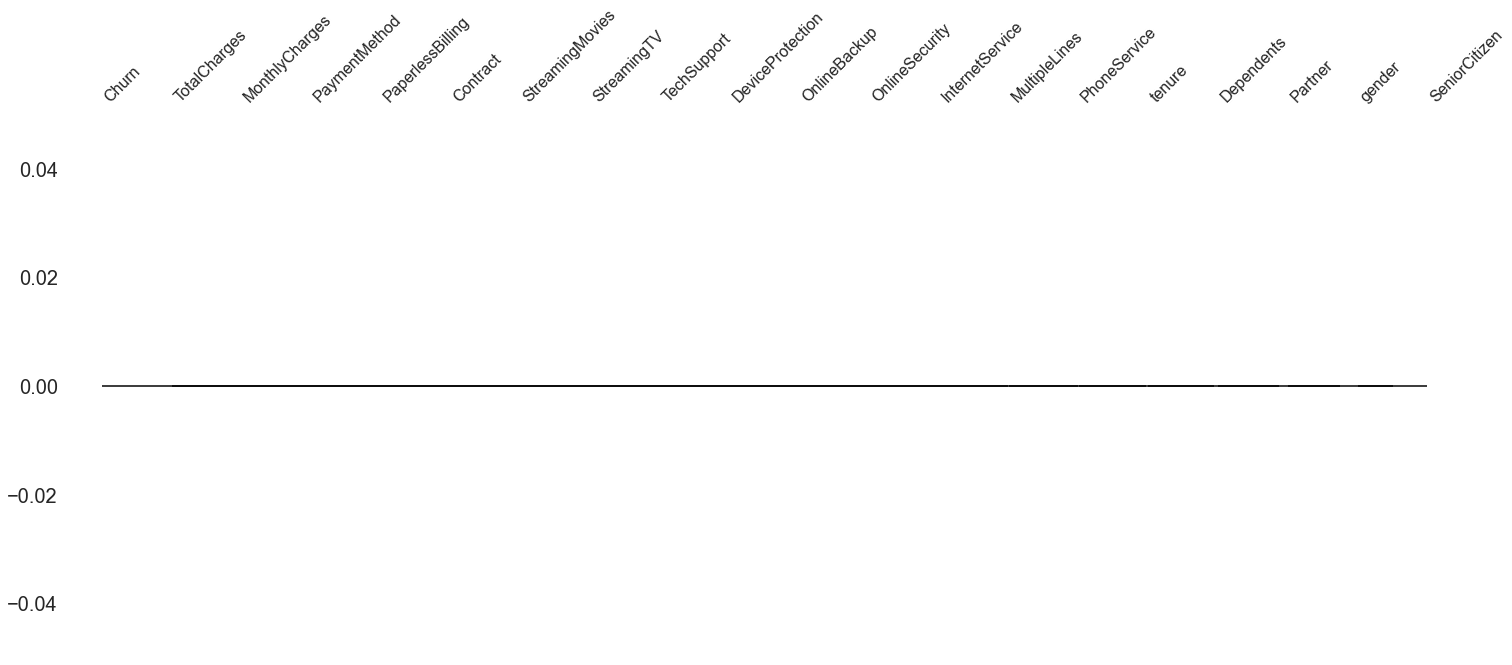

In [57]:
mano_module()    # less relevant in this case as there are no missing values 

less relevant in this case as there are no missing values

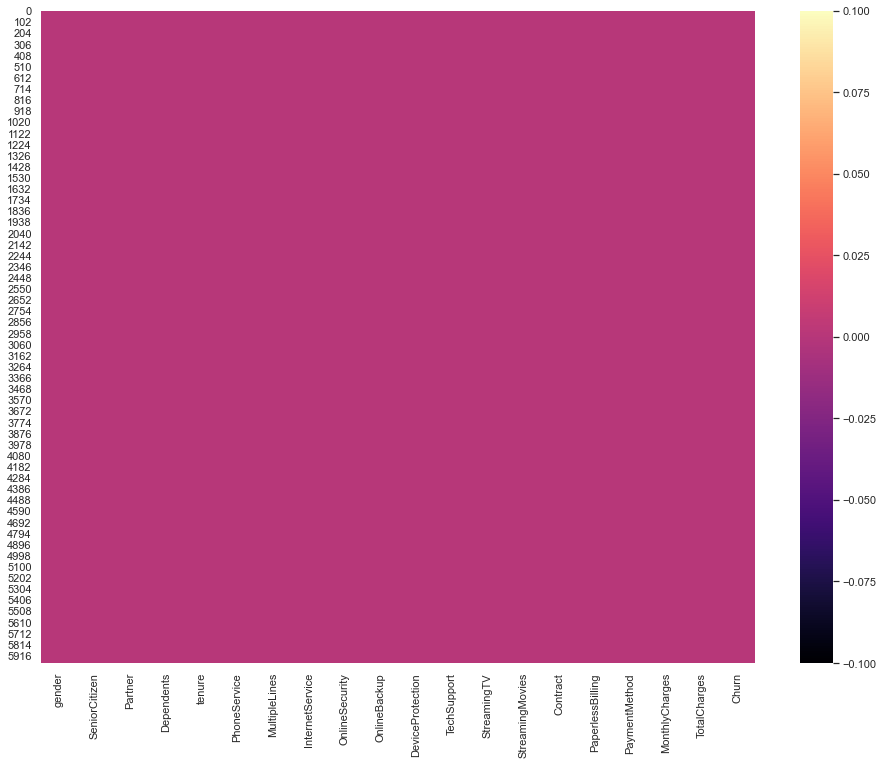

In [58]:
#Check for Missing Values
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

In [61]:
df_col = []
for i in range(len(df.columns)):
    df_col.append(str(df.columns[i]).strip())  

df.columns = df_col

above code is used to remove spaces from the begining and end of the column names

In [62]:
#Check if the data is balanced
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

No     4399
Yes    1587
Name: Churn, dtype: int64


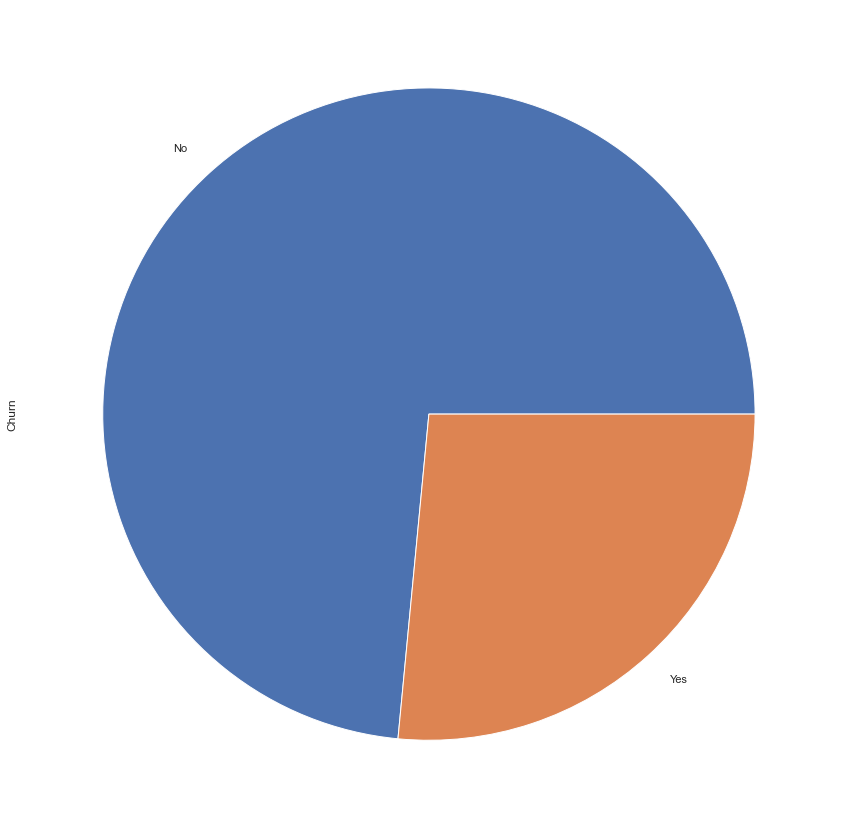

In [64]:
#target variable visualizing

df["Churn"].value_counts().plot(kind = "pie")
print(df["Churn"].value_counts())

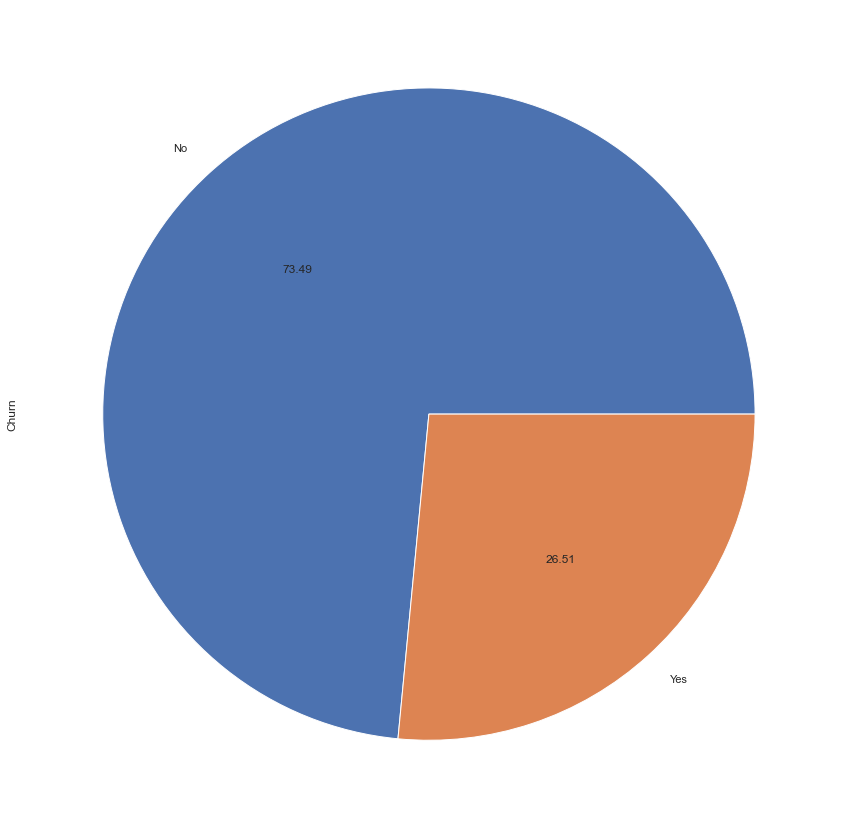

In [66]:
df['Churn'].value_counts().plot.pie(autopct="%.2f")

In [67]:
# see th churn %

(df["Churn"].value_counts()/df.shape[0])*100


No     73.488139
Yes    26.511861
Name: Churn, dtype: float64

company faces the churn issue with More than 1/4th of the customers hence it wants to analyse and predict the reason and solve it so they the can retain the customers 

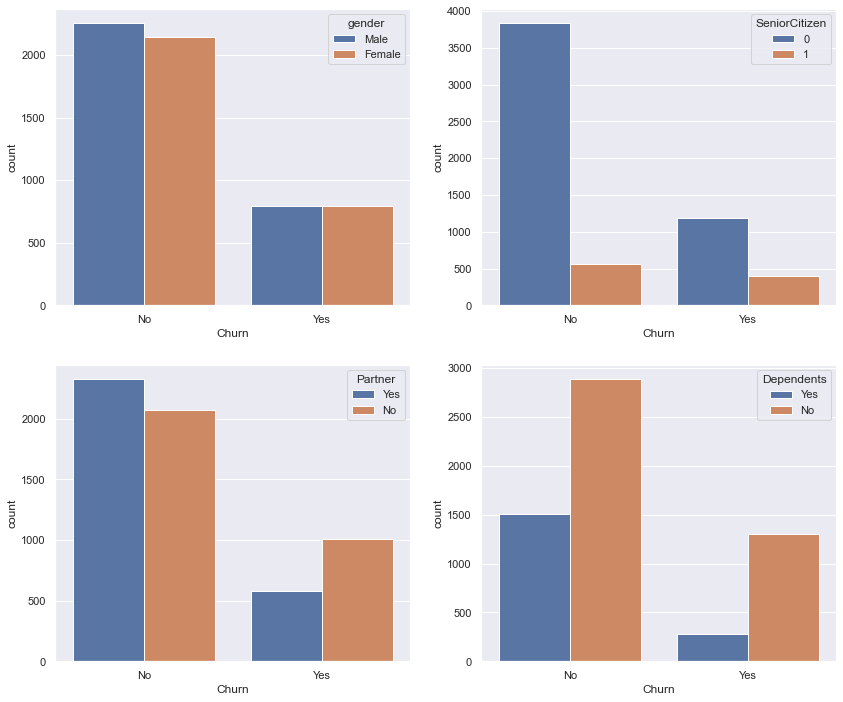

In [68]:
#plotting graphs to see the influence of different variables on our traget variable "Churn"

plt.figure(figsize=(14,12))

#gender influence on Churn
plt.subplot(2,2,1)
sns.countplot(df["Churn"],hue = df["gender"])


#Senior citizen influence on Churn
plt.subplot(2,2,2)
sns.countplot(df["Churn"],hue = df["SeniorCitizen"])



#Partner influence on Churn
plt.subplot(2,2,3)
sns.countplot(df["Churn"],hue = df["Partner"])

#dependents influence on Churn
plt.subplot(2,2,4)
sns.countplot(df["Churn"],hue = df["Dependents"])



- gender does not have as such influence in churn. Both genders have an equal churn  
- churn is higher in senior citizens (people who have retired) compared to non senior citizens- this may imply that people
who are employed have the money to pay the bills and hence they dont leave the service provider. Company can maybe look to provide 
special offers and rates to the senior citizens to reduce the churn for them 
- Churn is higher for people who are not married - this might imp;y some human behaviour factor
- Customers with no dependants have a higher churn compared to people with children

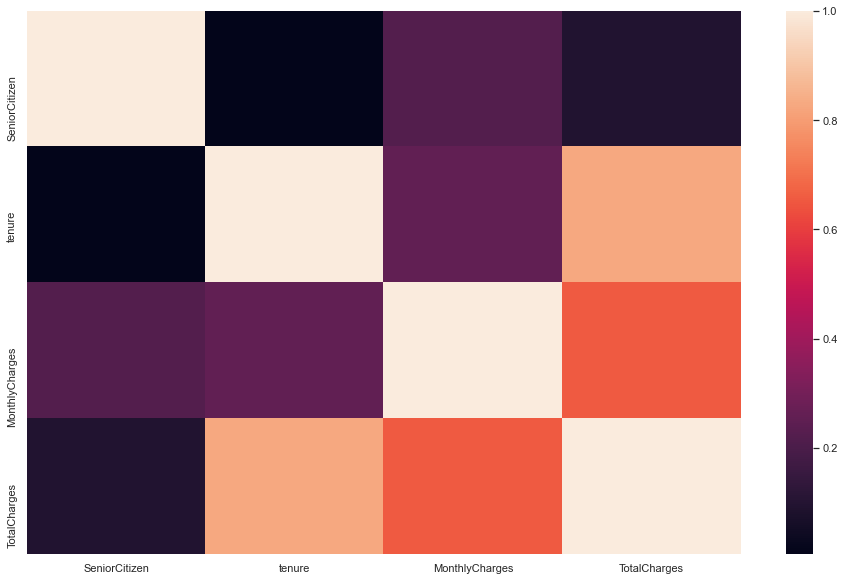

In [69]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr())

In [70]:
df["Churn"].value_counts()
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.005468,0.219387,0.093419
tenure,0.005468,1.000000,0.256983,0.826981
MonthlyCharges,0.219387,0.256983,1.000000,0.656322
TotalCharges,0.093419,0.826981,0.656322,1.000000


In [71]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [72]:
df2 = df.copy(deep=True)
#df = df2.copy(deep=True)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
5,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
6,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.60,No
7,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.90,No
8,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [73]:
# data cleaning and making it uniform for algorithm

#df['gender'] = df['gender'].astype(str)
#df['gender'] = df['gender'].replace({'1':'Male','0':'Female'})
df["gender"].replace(["Male","Female"],[1,0],inplace =True)

#PARTNER
#df['Partner'] = df['Partner'].astype(str)
#df['Partner'] = df['Partner'].replace({'1':'Yes','0':'No'})
df["Partner"].replace(["Yes","No"],[1,0],inplace =True)


#DEPENDENTS
#df['Dependents'] = df['Dependents'].astype(str)
df["Dependents"].replace(["Yes","No"],[1,0],inplace =True)


#MULTIPLELINES
df["MultipleLines"].replace(["Yes","No","No phone service"],[1,0,2],inplace = True)


#PHONESERVICE
df["PhoneService"].replace(["Yes","No"],[1,0],inplace =True)


#INTERNET SERVICES
df["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)


#CONTARCT
df["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)


#TECH SUPPORT
df["TechSupport"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#ONLINE SECURITY
df["OnlineSecurity"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#DEVICE PROTECTION
df["DeviceProtection"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#STREAMING MOVIES
df["StreamingMovies"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#STREAMING TV
df["StreamingTV"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#ONLINEBACKUP
df["OnlineBackup"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#PAPERLESS BILLING
df["PaperlessBilling"].replace(["No","Yes"],[0,1],inplace =True)


#PAYMENT METHOD
df["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)


#churn
df["Churn"].replace(["No","Yes"],[0,1],inplace =True)

In [74]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [75]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,2,2,2,2,2,2,2,1,0,3,24.10,1734.65,0
1,0,0,0,0,44,1,0,0,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
2,0,1,1,0,38,1,1,0,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,53.45,119.50,0
5,0,0,1,0,70,0,2,1,1,0,1,1,0,1,1,1,2,49.85,3370.20,0
6,0,0,0,0,33,1,1,0,1,0,0,0,0,1,0,1,0,90.65,2989.60,0
7,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,1,24.90,24.90,0
8,1,0,0,0,39,0,2,1,0,0,1,1,0,0,2,0,1,35.55,1309.15,0
9,1,1,0,0,55,1,1,0,1,1,1,1,1,1,0,1,0,116.50,6382.55,0


In [76]:
df = pd.get_dummies(df)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,2,2,2,2,2,2,2,1,0,3,24.10,1734.65,0
1,0,0,0,0,44,1,0,0,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
2,0,1,1,0,38,1,1,0,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,53.45,119.50,0
5,0,0,1,0,70,0,2,1,1,0,1,1,0,1,1,1,2,49.85,3370.20,0
6,0,0,0,0,33,1,1,0,1,0,0,0,0,1,0,1,0,90.65,2989.60,0
7,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,1,24.90,24.90,0
8,1,0,0,0,39,0,2,1,0,0,1,1,0,0,2,0,1,35.55,1309.15,0
9,1,1,0,0,55,1,1,0,1,1,1,1,1,1,0,1,0,116.50,6382.55,0


In [77]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,2,2,2,2,2,2,2,1,0,3,24.10,1734.65,0
1,0,0,0,0,44,1,0,0,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
2,0,1,1,0,38,1,1,0,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,53.45,119.50,0
5,0,0,1,0,70,0,2,1,1,0,1,1,0,1,1,1,2,49.85,3370.20,0
6,0,0,0,0,33,1,1,0,1,0,0,0,0,1,0,1,0,90.65,2989.60,0
7,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,1,24.90,24.90,0
8,1,0,0,0,39,0,2,1,0,0,1,1,0,0,2,0,1,35.55,1309.15,0
9,1,1,0,0,55,1,1,0,1,1,1,1,1,1,0,1,0,116.50,6382.55,0


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [79]:
corr_mat = df.corr()

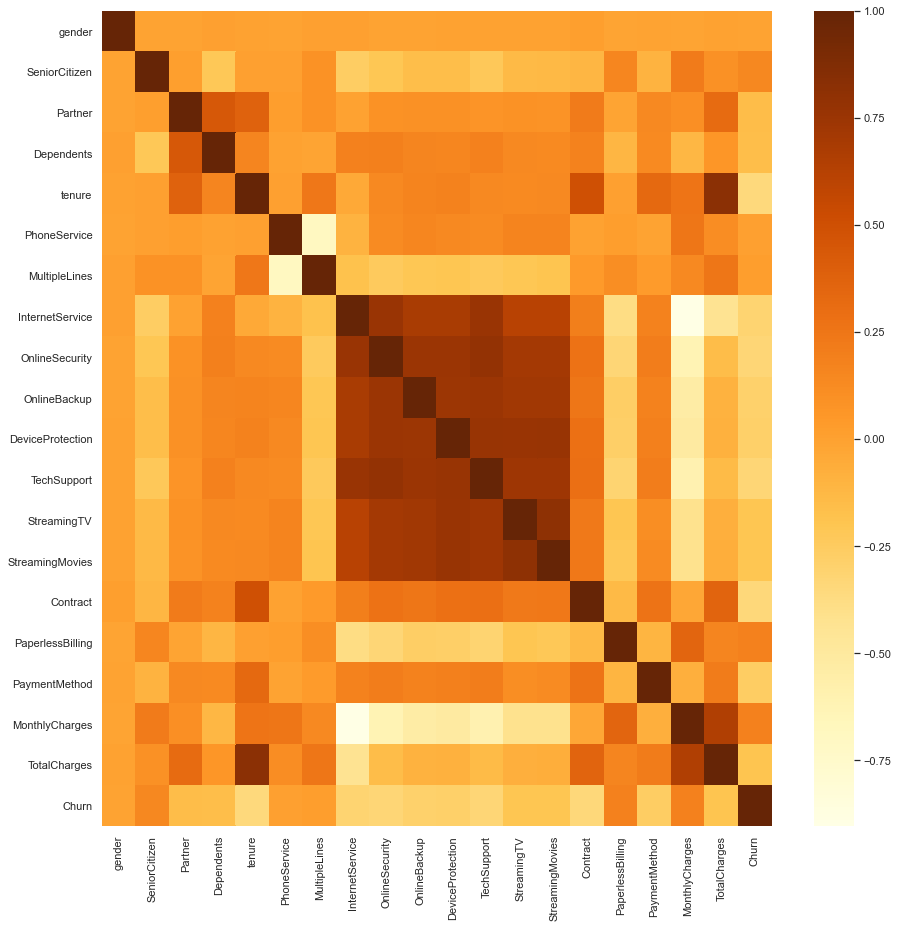

In [80]:
corr = df.corr()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr, cmap="YlOrBr")

In [81]:
corr_mat = corr_mat.iloc[1:,1:]

In [82]:
drop_list = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if(corr_mat.iloc[i,j] >= 0.95 or corr_mat.iloc[i,j] <= -0.95):
            if corr_mat.columns[j] not in drop_list:
                drop_list.append(corr_mat.columns[j])  

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. In my code i am dropping the columns that have correlationfactor of more than 0.95 or less then -0.95

In [83]:
len(drop_list)

0

#Train Test Split: splitting manually def traintestsplit(df,split,random=None, label_col=''):

#make a copy of the label column and store in y
y = df[label_col].copy()

#now delete the original
X = df.drop(label_col,axis=1)

In [85]:
#Data Preparation
y = df['Churn']
X = df.drop(['Churn'], axis = 1)

In [86]:
#Importing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [87]:
!pip install imbalanced-learn

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

1    4399
0    4399
Name: Churn, dtype: int64

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 101, stratify = y_sm)

In [91]:
#Data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

In [93]:
#parameter tuning

model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30,50],
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['lbfgs','liblinear']
        }
    },
   'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [1,3,5,7],
            'algorithm':['auto','kd_tree']
        }
    }
}

applying cross validation (Grid Search CV) for 4 models(SVM,Random Forest, Logistic Regression & K Nearest Neighbours)

In [94]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, verbose=3, n_jobs=-1, scoring = 'recall', return_train_score=False)
    clf.fit(X_scaled, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


,model,best_score,best_params
0,svm,0.802437,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.803108,"{'criterion': 'entropy', 'n_estimators': 50}"
2,logistic_regression,0.787886,"{'C': 1, 'solver': 'lbfgs'}"
3,KNN,0.829259,"{'algorithm': 'auto', 'n_neighbors': 7}"


The above table shows the tuned parameters for each of the models that I want to apply. Based on these parameters I will implement each of the models and explore their accuracy and recall

In [ ]:
SVM

In [95]:
model_svm = SVC(gamma='auto',C=1, kernel='linear', probability=True )
model_svm.fit(X_train,y_train)
svm_predictions = model_svm.predict(X_test)

In [96]:
#Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,svm_predictions))

,0,1
0,666,214
1,144,736


In [97]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       880
           1       0.77      0.84      0.80       880

    accuracy                           0.80      1760
   macro avg       0.80      0.80      0.80      1760
weighted avg       0.80      0.80      0.80      1760



SVM has accuracy rate of 80%. Specifically, the model is able to predict the the churn for Telco customers with almost 82-84% accuracy.

Random forest classifier

In [99]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy' )
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [100]:
#Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,720,160
1,145,735


In [101]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       880
           1       0.82      0.84      0.83       880

    accuracy                           0.83      1760
   macro avg       0.83      0.83      0.83      1760
weighted avg       0.83      0.83      0.83      1760



RFC has accuracy rate of 83%. Specifically, the model is able to predict the the churn for Telco customers with almost 83-84% accuracy.

Logistic regression

In [102]:
logmodel = LogisticRegression(solver='lbfgs',multi_class='auto', C = 1)
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)

In [103]:
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,log_predictions))

,0,1
0,676,204
1,153,727


In [104]:
#Printing Classification Report
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       880
           1       0.78      0.83      0.80       880

    accuracy                           0.80      1760
   macro avg       0.80      0.80      0.80      1760
weighted avg       0.80      0.80      0.80      1760



Logistic Regression has accuracy rate of 80%. Specifically, the model is able to predict the the churn for Telco customers with almost 83% accuracy.

KNN

In [105]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm = 'auto')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [106]:
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,knn_pred))

,0,1
0,635,245
1,136,744


In [107]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       880
           1       0.75      0.85      0.80       880

    accuracy                           0.78      1760
   macro avg       0.79      0.78      0.78      1760
weighted avg       0.79      0.78      0.78      1760



KNN has accuracy rate of 78%. Specifically, the model is able to predict the the churn for Telco customers with almost 82-85% accuracy.

ROC Curve and Area Under the Curve

In [108]:
from sklearn.metrics import roc_curve, auc

In [109]:
# ROC Logistic

y_pred_logistic = logmodel.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

In [110]:
# ROC RAndomforest

y_pred_rfc = rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

In [111]:
#ROC SVM

y_pred_svm = model_svm.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

In [112]:
# ROC KNN

y_pred_knn = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

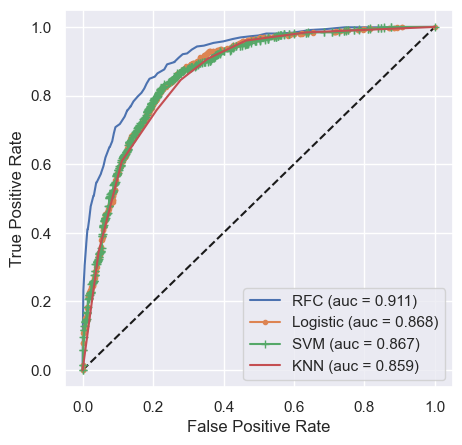

In [113]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_rfc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

Conclusion: All the models have a high accuracy of more than 80% but out of all the 4 RandomForest have the highest performance.  Hence we can rely on the outcome of this model for making decision

In [ ]:
XG BOOST

In [114]:
!pip install xgboost

In [115]:
#Importing Packages
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [116]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)
    
    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


Without addressing class imbalance 

In [173]:
#splitting of dataset
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2)

In [174]:
#cross validation
def val(a,b,classifier):
    val = cross_val_score(classifier,a,b,scoring = "accuracy",cv = 10)
    return val
    

In [175]:
#accuarcy
def accuracy(a,b):
    ac = accuracy_score(a,b)
    cr = classification_report(a,b)
    print("accuracy score : ",ac)
    print("--"*15)
    print("Classification report :",cr)
    return ac

In [176]:
#KNN algorithm
knc = KNeighborsClassifier(n_neighbors=23)
knc.fit(x_train,y_train)
knc_pred = knc.predict(x_test)

In [177]:
acc_knn = accuracy(y_test,knc_pred)

accuracy score :  0.7362270450751253
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.77      0.91      0.84       894
           1       0.46      0.21      0.29       304

    accuracy                           0.74      1198
   macro avg       0.62      0.56      0.56      1198
weighted avg       0.69      0.74      0.70      1198



In [181]:
print(confusion_matrix(y_test, knc_pred))

[[818  76]
 [240  64]]


In [184]:
error = []
# Calculating error for K values between 1 and 35
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

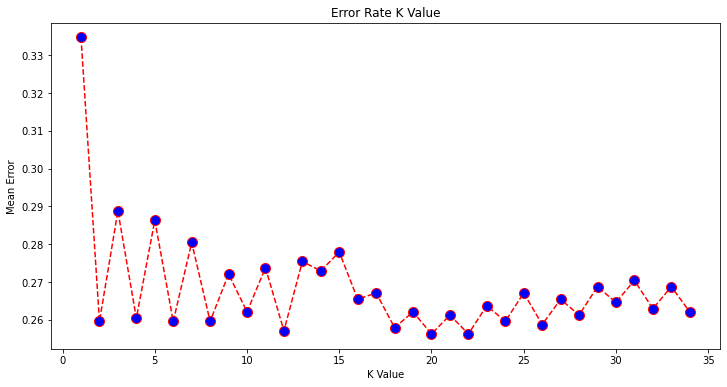

In [185]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [188]:
#try with k value of 12

#KNN algorithm
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(x_train,y_train)
knc_pred = knc.predict(x_test)

In [189]:
acc_knn = accuracy(y_test,knc_pred)

accuracy score :  0.7429048414023373
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.77      0.94      0.85       894
           1       0.48      0.16      0.25       304

    accuracy                           0.74      1198
   macro avg       0.62      0.55      0.55      1198
weighted avg       0.69      0.74      0.69      1198



In [190]:
print(confusion_matrix(y_test, knc_pred))

[[840  54]
 [254  50]]


error reduced when the k value is used as 12

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Considering confusion matrix above:

True negative = 840

False positive = 54

True postive = 50

False negative = 254

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class



In [186]:
#F18: Function to generate scatter plot

def f18(df):
    import numpy as np
    import matplotlib.pyplot as plt
    column_one = input("Enter the column you want to plot:")
    column_two = input("Enter another column you want to plot:")
    df.plot(x=column_one,y=column_two,kind='scatter',alpha=0.5,cmap='rainbow')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Enter the column you want to plot:Churn
Enter another column you want to plot:TotalCharges


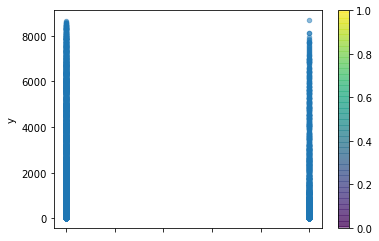

In [187]:
f18(df)